# 1. Defining the question



a) **Specifying the data analytic question**

The main objective of this study is to build a model that can classify a lung that has been infected with Tuberculosis and a normal lung using images of chest x-rays.


**b)Defining the Metrics for success**

To meet the objective of the study we will create the a model using Convolutional Neural Network, we consider it approporiate as it specializes in image recognition and computer vision tasks.

We will subject the evaluation to the assumptions of the model and compare performance based on accuracy score and make our conlusion. We will aim at an accuracy of 80% and above.


**c) Understanding the context**

With Tuberculosis infections still active as the COVID-19 pandemic continues, an automated tool to help identify TB has the potential to reduce hospital workload and optimize patient care during a time when hospitals are being overwhelmed by COVID-19 cases. Zindi Africa, launched this challenge in search of a solution to this. 

Tuberculosis (TB) is a global disease, found in every country in the world. It is the leading infectious cause of death worldwide. The World Health Organization estimates that 1.8 billion people—close to one quarter of the world's population—are infected with Mycobacterium tuberculosis (M.tb), the bacteria that causes TB. In 2018, 10 million fell ill from TB and 1.5 million died. TB is responsible for economic devastation and the cycle of poverty and illness that entraps families, communities and even entire countries. Among the most vulnerable are women, children, and those with HIV/AIDS. There is growing resistance to available drugs, which means the disease is becoming more deadly and difficult to treat. There were more than half a million cases of drug resistant TB last year.


What is Tuberculosis?


Tuberculosis (TB) is a disease caused by a germ called Mycobacterium tuberculosis that is spread from person to person through the air. TB usually affects the lungs, but it can also affect other parts of the body, such as the brain, the kidneys, or the spine.

How is Tuberculosis spread?


When a person with infectious TB coughs or sneezes, droplet nuclei containing M. tuberculosis are expelled into the air. If another person inhales air containing these droplet nuclei, he or she may become infected. However, not everyone infected with TB bacteria becomes sick. As a result, two TB-related conditions exist: latent TB infection and TB disease

Latent TB infection (LTBI)


Persons with latent TB infection do not feel sick and do not have any symptoms. They are infected with M. tuberculosis, but do not have TB disease. Persons with latent TB infection are not infectious and cannot spread TB infection to others. TB Disease In some people, TB bacteria overcome the defenses of the immune system and begin to multiply, resulting in the progression from latent TB infection to TB disease. Some people develop TB disease soon after infection, while others develop TB disease later when their immune system becomes weak. Some symptoms of TB disease include: Unexplained weight loss, Loss of appetite, Night sweats, Fever, Fatigue and Chills Diagnosis The following tests can be used to detect TB bacteria in the body; TB skin test A small amount of a substance called PPD tuberculin is injected just below the skin of your inside forearm. You should feel only a slight needle prick.Within 48 to 72 hours, a health care professional will check your arm for swelling at the injection site. A hard, raised red bump means you're likely to have TB infection. The size of the bump determines whether the test results are significant.

TB blood tests may be used to confirm or rule out latent or active tuberculosis. These tests use sophisticated technology to measure your immune system's reaction to TB bacteria.These tests require only one office visit. A blood test may be useful if you're at high risk of TB infection but have a negative response to the skin test, or if you've recently received the BCG vaccine. Imaging tests If you've had a positive skin test, your doctor is likely to order a chest X-ray or a CT scan.On a chest x-ray from someone with TB you can often see the cavitation that the TB bacteria form in the lung tissue. TB cavities are often in the upper parts of the lung, also known as the apex. This may be white spots in your lungs where your immune system has walled off TB bacteria, or it may reveal changes in your lungs which could be caused by active tuberculosis or other things that are not necessarily TB hence chest x-rays have poor specificity. Therefore chest x-rays are usually an indicator of whether or not a person might have TB, but they cannot confirm the diagnosis. They are used to confirm a suspicion, and will always be followed by tests that aim at finding the TB bacterium. The diagnosis of TB cannot be made by a chest x-ray alone. It can also not be excluded by a chest x-ray.CT scans provide more-detailed images than do X-rays. Sputum tests If your chest X-ray shows signs of tuberculosis, your doctor may take samples of your sputum — the mucus that comes up when you cough. The samples are tested for TB bacteria.Sputum samples can also be used to test for drug-resistant strains of TB. This helps your doctor choose the medications that are most likely to work. These tests can take four to eight weeks to be completed. The symptoms of TB of the lungs include; Coughing for 3 weeks or longer Hemoptysis (coughing up blood) Chest pain Other symptoms depend on the part of the body that is affected.



**d) Recording the experimental design**

The following steps were implemented

1.) Business Understanding.

2.) Reading the data.

3.) Prepare the data for modelling

4.) Modelling

6.) Challenging the solution

7.) Conclusion/recommendations


**e)Data Relevance**

The training dataset provided for this study consists of columns with chest X-ray images, ID and label. The dataset was on Zindi Africa site and following instituition are acknowledged.

1. Montgomery County X-ray Set: X-ray images in this data set have been acquired from the tuberculosis control program of the Department of Health and Human Services of Montgomery County, MD, USA.

2. Shenzhen Hospital X-ray Set: X-ray images in this data set have been collected by Shenzhen No.3 Hospital in Shenzhen, Guangdong province, China. The x-rays were acquired as part of the routine care at Shenzhen Hospital.


In [ ]:
#Checking the processor
import tensorflow as tf 
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 115603558541622103, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 11495157979060622784
 physical_device_desc: "device: XLA_CPU device", name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 16438695523658368105
 physical_device_desc: "device: XLA_GPU device", name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14640891840
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 6831971274745149436
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"]

In [ ]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2

OS library

The OS module in python provides functions for interacting with the operating system. OS, comes under Python's standard utility modules. This module provides a portable way of using operating system dependent functionality. The os and os. path modules include many functions to interact with the file system.

CV2 library

This is a cross-platform library which we can develop real-time computer vision applications. It mainly focuses on image processing, video capture and analysis including features like face detection and object detection.

In [ ]:
# Read the .csv files
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')

train.head()

,filename,ID,LABEL
0,train/VTYNBFTO.png,VTYNBFTO,1
1,train/GVVXXDOZ.png,GVVXXDOZ,0
2,train/PMRSQLXN.png,PMRSQLXN,0
3,train/JXISWDUU.png,JXISWDUU,1
4,train/JVWMAACC.png,JVWMAACC,1


In [ ]:
#Checking the shape the train dataset
train.shape

(718, 3)

Train dataset has 718 records and 3 columns

The columns are:

file name: This contains the X-ray Image of the file

ID: Identifier of the file name

Label: This represents the class. 0: X-ray of healthy lung and 1: X-ray of TB Positive lung

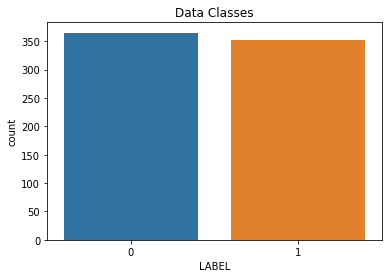

In [ ]:
#Visualising label
import seaborn as sns
class0 = train.groupby(by='LABEL').get_group(0)
class1 = train.groupby(by='LABEL').get_group(1)

sns.countplot(x='LABEL', data=train)
plt.title('Data Classes')
plt.show()

We observe that the number of images in the training data have almost a 50/50 representation. We have 353 images of X-rays of TB-positive lungs (Class 1) and 365 images of X-rays of healthy lungs (Class 0).

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


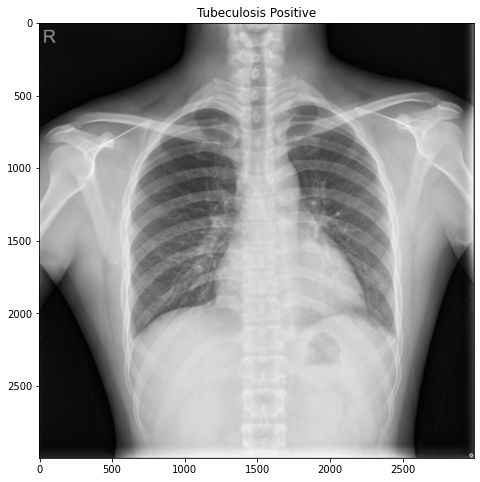

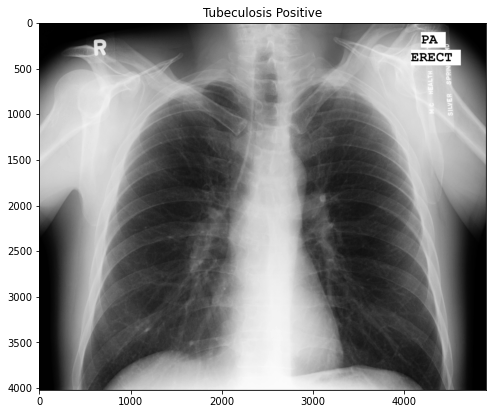

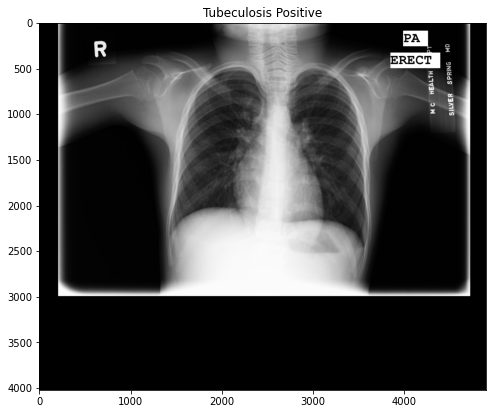

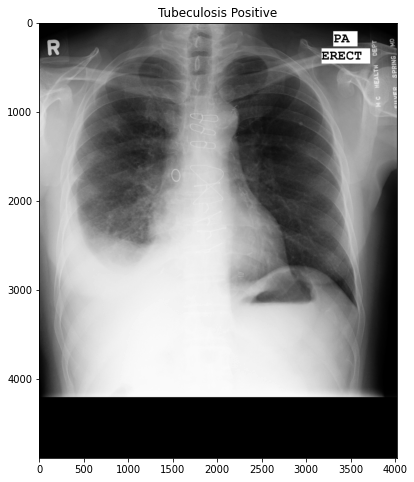

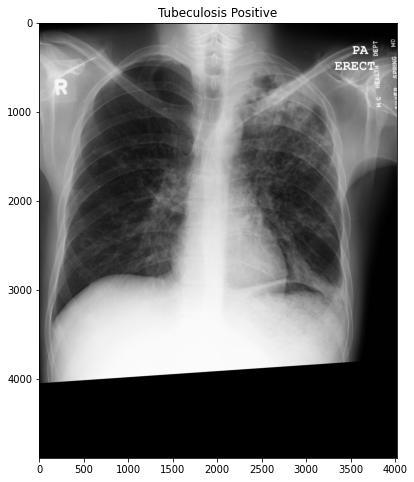

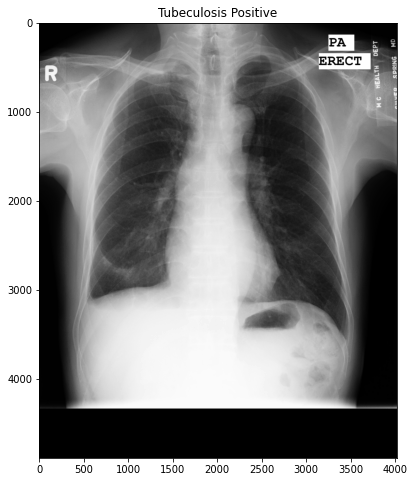

In [ ]:
# Load the training data set from google drive
DATADIR = '/content/drive/My Drive/Train sample images'
CATEGORIES = ['class 1']

for category in CATEGORIES:
  path = os.path.join(DATADIR, category) #path to class 0/1 dir
  for img in os.listdir(path):
    img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
    plt.figure(figsize=(8,8))
    plt.imshow(img_array, cmap='gray')
    plt.title("Tubeculosis Positive")
    plt.show()

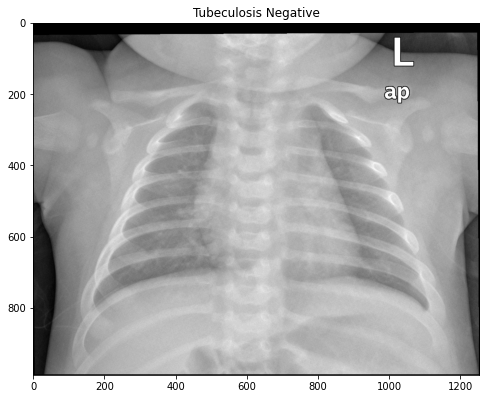

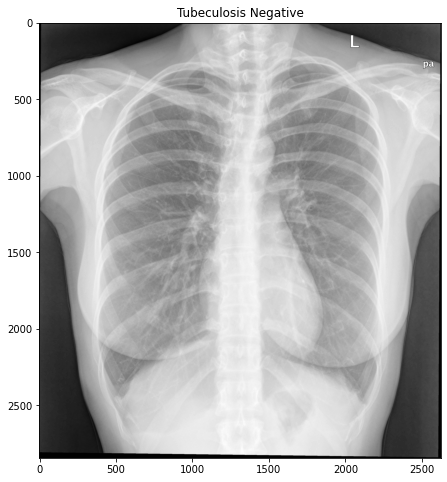

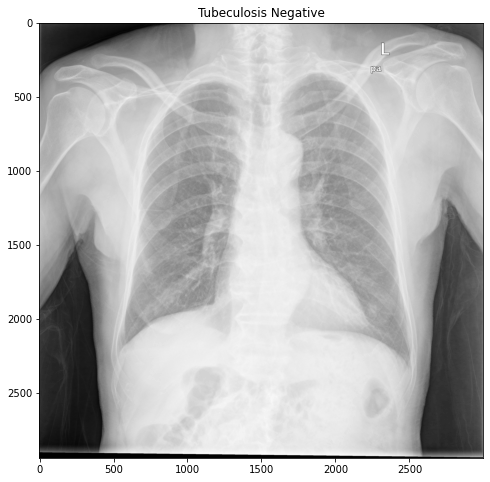

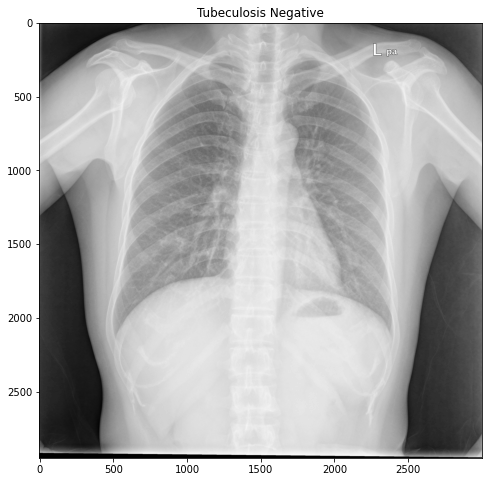

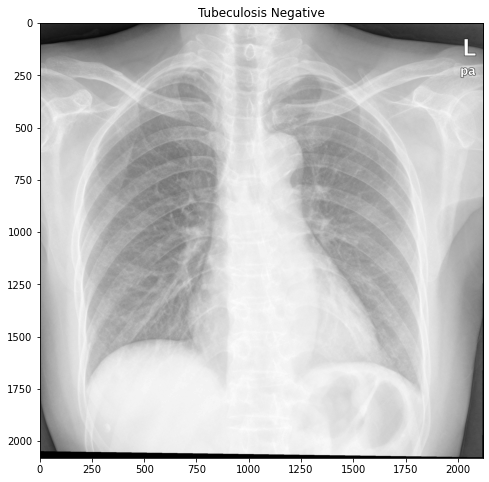

In [ ]:
# Load the training data set from google drive
DATADIR = '/content/drive/My Drive/Train sample images'
CATEGORIES = ['Class 0']

for category in CATEGORIES:
  path = os.path.join(DATADIR, category) #path to class 0/1 dir
  for img in os.listdir(path):
    img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
    plt.figure(figsize=(8,8))
    plt.imshow(img_array, cmap='gray')
    plt.title("Tubeculosis Negative")
    plt.show()

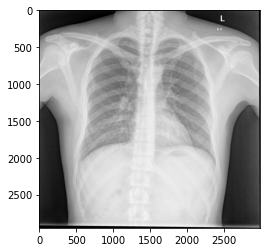

In [ ]:
# Load the training data set from google drive
DATADIR = '/content/drive/My Drive/Train'
CATEGORIES = ['class 0', 'class 1']

for category in CATEGORIES:
  path = os.path.join(DATADIR, category) #path to class 0/1 dir
  for img in os.listdir(path):
    img_array = cv2.imread(os.path.join(path,img))
    plt.imshow(img_array, cmap='gray')
    plt.show()
    break
  break 

We observe an X-ray image of a heathy lung is lighter in color in comparison to a TB positive lung

In [ ]:
# Check sample image shape
print(img_array.shape)

(2951, 2989, 3)


Sample image shape is 2,935 by 2,935. 3 represents the color but we converted our images to grayscale

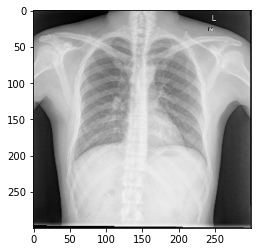

In [ ]:
# Resize the image 
IMG_SIZE = 300

new_array = cv2.resize((img_array), (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

For consitency and ease data processing, we resized the image to 300pixels

In [ ]:
# Create the training data set
training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category) #path to class 0/1 dir
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):

          try:
              img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)

              new_array = cv2.resize((img_array), (IMG_SIZE, IMG_SIZE))
              training_data.append([new_array, class_num])
          except Exception as e:
              pass

create_training_data() # Call the function we created

In [ ]:
# Check length of training data
print(len(training_data))

718


Training dataset has 718 images

In [ ]:
# Shuffle the data set
import random

random.Random(29).shuffle(training_data)

In [ ]:
# Preview the classes that were sampled
for sample in training_data[:10]:
  print(sample[1])

1
1
0
0
1
0
0
1
1
0


Training data shuffled to get random class

In [ ]:
# Initiate list to append features and labels
X = []
y = []

# Appending features and labels
for features, label in training_data:
  X.append(features)
  y.append(label)

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [ ]:
import pickle

# The open() funtion is to open the file while the close () function is to close the file
# The first argument is the name of the file for our x variable 
# The second argument is 'wb'. The w means that you'll be writing to the file, and b refers to binary mode i.e writing the data in the form of byte objects
pickle_out = open('X.pickle', 'wb')
pickle.dump(X, pickle_out)            #storing the contents in the x variable in the opened file
pickle_out.close()                    #closing the file with the stored content

pickle_out = open('y.pickle', 'wb')   #opening a file for the y variable
pickle.dump(y, pickle_out)            #dumping and storing contents in the opened file
pickle_out.close()                    #closing the file 

The pickle module implements binary protocols for serializing and de-serializing a Python object structure. Serialization or marshaling is the process of converting object state into a format that can be transmitted or stored. “Pickling” is the process whereby a Python object hierarchy is converted into a byte stream, and “unpickling” is the inverse operation, whereby a byte stream (from a binary file or bytes-like object) is converted back into an object hierarchy. 


## Modelling

CNN is a branch of Neural Networks that are used in computer vision tasks for
image analysis. The network specializes on pattern detection where it detects patterns and makes sense of them. 

**Some common applications of Neural Networks are :**

*   Facial Recognition
*   Detection of diseases
*   Self-driving cars

**Vocabulary used in CNN**

*   Filters - a matrix initiated by numbers that is able to detect special features. The matrix slides through the input layer in an attempt to detect patterns i.e it is the basis of feature learning
*   Feature maps - A matrix of numbers obtained by adding multiple filter outputs to put together learned features
*   Stride - steps taken when sliding through an image, both in horizontal and vertical directions separately
*  Padding - adding one pixel all around the edges to take care of shrinking obtained from a convolution operation  
*  Activation function - a function to introduce non - linearity to the data, most real world cases are non - linear
*  Pooling - downsampling operation on each feature maps.
*  

**Steps to a basic convolution Operation**

1. Apply a set of weights to the input (pixels)
2. Slide a filter through the weights to extract local features
3. Use multiple filters to extract multiple features
4. Spatially share parameters of each filter to the feature map

**How do Convolution Neural Networks work?**

              _step 1_: Input 
              _step 2_: Feature learning
              _step 3_: Classification

**step 1:**
An image is fed into the model where it is converted to pixels

**step 2:**
*   learn features in input image through convolution
*   Introduce non-linearity through activation function
*   Reduce dimensionality and preserve spatial invariance through pooling

**step 3**: Use the learned features to classify our image

*   Flattening - The features that have been learned are output as high level features of input hence they need to be flattened 
*   Fully connected layers/ dense layers - uses these features to classify an image 
*   Express output as a probability of image belonging to a particular class
*   Output layer - the last layer of the neural network

**Advantages of Neural Networks**

*  Preserve the spatial orientation of the features
*  Reduced number of parameters


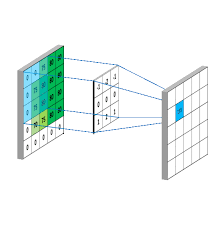

Tensorflow is a library used for machine learning models. TensorFlow’s high-level APIs are based on the Keras API standard for defining and training neural networks. 

Tensorboard is a tool for providing the measurements and visualizations needed during the machine learning workflow. It enables tracking experiment metrics like loss and accuracy, visualizing the model graph, projecting embeddings to a lower dimensional space, and much more.

In [ ]:
# Import libraries for modelling
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPool2D, BatchNormalization
from tensorflow.keras.callbacks import TensorBoard
import datetime
import time

In [ ]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

# Clear any logs from previous runs
!rm -rf ./logs/ 

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


## Baseline Model

In [ ]:
# Load pickled file back into a python program
# use the open() function, with 'rb' as second argument (instead of wb). The r stands for read mode and the b stands for binary mode. 
pickle_in = open('X.pickle', 'rb')
X = pickle.load(pickle_in)      # loading the file with the contents of x variable

pickle_in = open('y.pickle', 'rb')
y = pickle.load(pickle_in)      # loading the file with the contents of the y variable
y = np.array(y)                 # convering y into an array

X = X/255.0                     # standardizing the pixels

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(X_train)

In [ ]:
model = Sequential()
model.add(ZeroPadding2D((1,1),input_shape=train_batches.image_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 298, 298, 32)      320       
_________________________________________________________________
activation (Activation)      (None, 298, 298, 32)      0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 149, 149, 32)      0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 147, 147, 64)      18496     
_________________________________________________________________
activation_1 (Activation)    (None, 147, 147, 64)      0         
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 73, 73, 64)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 71, 71, 128)      

In [ ]:
from keras.callbacks import ReduceLROnPlateau
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.3, min_lr=0.000001)

In [ ]:
history = model.fit(datagen.flow(X_train,y_train, batch_size = 32) ,epochs = 20 , validation_data = datagen.flow(X_test, y_test) ,callbacks = [tensorboard_callback])

Epoch 1/20
18/18 [==============================] - 5s 251ms/step - loss: 0.5452 - accuracy: 0.7247 - val_loss: 0.5967 - val_accuracy: 0.6528
Epoch 2/20
18/18 [==============================] - 4s 244ms/step - loss: 0.5505 - accuracy: 0.7247 - val_loss: 0.5534 - val_accuracy: 0.7222
Epoch 3/20
18/18 [==============================] - 4s 246ms/step - loss: 0.5638 - accuracy: 0.7091 - val_loss: 0.5613 - val_accuracy: 0.6875
Epoch 4/20
18/18 [==============================] - 5s 252ms/step - loss: 0.5658 - accuracy: 0.7108 - val_loss: 0.5268 - val_accuracy: 0.7500
Epoch 5/20
18/18 [==============================] - 4s 249ms/step - loss: 0.5598 - accuracy: 0.7230 - val_loss: 0.5295 - val_accuracy: 0.7917
Epoch 6/20
18/18 [==============================] - 4s 248ms/step - loss: 0.5660 - accuracy: 0.7073 - val_loss: 0.5521 - val_accuracy: 0.7569
Epoch 7/20
18/18 [==============================] - ETA: 0s - loss: 0.5626 - accuracy: 0.7230
Epoch 00007: ReduceLROnPlateau reducing learning rate 

In [ ]:
# Stacking convolution layers
NAME = 'Baseline Model'     # naming our baseline model
tensorboard_callback = TensorBoard(log_dir="logs/fit/{}".format(NAME))
print(NAME)

model = Sequential()        # defining a model in sequential class i.e linearly stacking layers

model.add(  Conv2D(32, (3,3), input_shape = X.shape[1:]) )  # Defining a convolution layer with 32 filters of sizes 3*3
model.add(Activation('relu'))            #  Rectified Linear Activation Function
model.add(MaxPooling2D(pool_size=(2,2))) #  Pooling using the maximum pooling operation

# a second convolution layer 
model.add(Conv2D(64, (3,3)))
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size=(2,2)))

# a second convolution layer 
model.add(Conv2D(128, (3,3)))
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128, (3,3)))
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten()) # converts 3D features to 1D feature vectors

model.add(Dense(1))               # one dense layer
model.add(Activation('sigmoid'))  #sigmoid activation function

model.compile(loss='binary_crossentropy',
                    optimizer='adam',
                    metrics=['accuracy'])
model.summary()    # to determine the architecture of the model

model.fit(X, y, epochs=10, validation_split=0.2, callbacks=[tensorboard_callback])

Baseline Model
Model: "sequential_35"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_117 (Conv2D)          (None, 298, 298, 32)      320       
_________________________________________________________________
activation_163 (Activation)  (None, 298, 298, 32)      0         
_________________________________________________________________
max_pooling2d_117 (MaxPoolin (None, 149, 149, 32)      0         
_________________________________________________________________
conv2d_118 (Conv2D)          (None, 147, 147, 64)      18496     
_________________________________________________________________
activation_164 (Activation)  (None, 147, 147, 64)      0         
_________________________________________________________________
max_pooling2d_118 (MaxPoolin (None, 73, 73, 64)        0         
_________________________________________________________________
conv2d_119 (Conv2D)          (None, 71

**Architecture of the model**

The model has two convolution layers, each with an activation function and a pooling layer. The second conv layer is then flattened ( from a 3D to a 1D array as the output is of the convolution layer is a volume of images). The flattened array is then input to a dense layer and activated with a non linearity, this is now the input of the final dense layer that is activated with a sigmoid function to classify the lungs.


**Evaluation of the model**

Our baseline model has 10 epochs and a validation set of 20%.
**Train set**

The loss on the train sets decreases with each epoch while the accuracy increases with each epoch. The best accuracy obtained is approximately 98%, which is likely to ben an overfit

**Validation set**

There is no observable trend on the loss or the accuracy of the validation set. 

From the above, the best performing model is the fourth epoch with an accuarcy of 82% on the training set and 84% on the testing set. With an equally high accuracy on both sets, we are confident that the model is Not overfit.


In [ ]:
from tensorflow.keras.optimizers import Adam

# Loading data of x variable from pickle
#pickle_in = open('X.pickle', 'rb')
#X = pickle.load(pickle_in)

# Loading data from y variable from pickle
#pickle_in = open('y.pickle', 'rb')
#y = pickle.load(pickle_in)
#y = np.array(y)

#X = X/255.0 # Standardize the features

#dense_layers = [0,1]    # using 0 and 1 dense layers
#layer_sizes = [32,128]  # creating 32 and 128 nodes
#conv_layers = [3,4]     # 3 and 4 convolution layers

# creating a for loop to iterate through each of the above layers
for dense_layer in dense_layers:
  for layer_size in layer_sizes:
    for conv_layer in conv_layers:
      NAME = '{}-conv-{}-nodes-{}-dense{}'.format(conv_layer, layer_size, dense_layer, int(time.time()))
      tensorboard_callback = TensorBoard(log_dir="logs/fit/{}".format(NAME))
      print(NAME)

      # Stacking convolution layers
      model = Sequential()

      model.add(  Conv2D(64, (3,3), input_shape = X.shape[1:])  )
      model.add(Activation('relu')) #  Rectified Linear Activation Function
      model.add(MaxPool2D(pool_size=(2,2)))

      for l in range(conv_layer - 1):
          model.add(Conv2D(64, (3,3)))
          model.add(Activation('relu'))
          model.add(MaxPool2D(pool_size=(2,2)))

      model.add(Flatten()) # converts 3D features to 1D feature vectors
      for l in range(dense_layer):
          model.add(Dense(layer_size))
          model.add(Activation('relu'))

      model.add(Dense(1))
      model.add(Activation('sigmoid'))

      model.compile(loss='binary_crossentropy',
                    optimizer= 'adam', 
                    metrics=['accuracy'])

      model.fit(X, y, epochs=15, validation_split=0.2, callbacks=[tensorboard_callback])
      model.save(NAME)

3-conv-32-nodes-0-dense1598526685
Epoch 1/20
18/18 [==============================] - 5s 297ms/step - loss: 0.7403 - accuracy: 0.5052 - val_loss: 0.6930 - val_accuracy: 0.4931
Epoch 2/20
18/18 [==============================] - 5s 267ms/step - loss: 0.6702 - accuracy: 0.5679 - val_loss: 0.6816 - val_accuracy: 0.6806
Epoch 3/20
18/18 [==============================] - 5s 268ms/step - loss: 0.6549 - accuracy: 0.6725 - val_loss: 0.6462 - val_accuracy: 0.6875
Epoch 4/20
18/18 [==============================] - 5s 266ms/step - loss: 0.6464 - accuracy: 0.6812 - val_loss: 0.6509 - val_accuracy: 0.6806
Epoch 5/20
18/18 [==============================] - 5s 265ms/step - loss: 0.6419 - accuracy: 0.6498 - val_loss: 0.6305 - val_accuracy: 0.6806
Epoch 6/20
18/18 [==============================] - 5s 266ms/step - loss: 0.6346 - accuracy: 0.6916 - val_loss: 0.5855 - val_accuracy: 0.7500
Epoch 7/20
18/18 [==============================] - 5s 265ms/step - loss: 0.6314 - accuracy: 0.6603 - val_loss: 0.

KeyboardInterrupt: ignored

The following are our best models from each iteration:

              4- conv layers, 128 nodes, 1 dense layer: 
              train accuracy ~88%, validation accuracy ~87%
              
              3- conv layers, 128 nodes, 1 dense layer:
              train accuracy 87%, validation accuracy 86%

              4-conv layers, 32 nodes, 1 dense layer:
              train accuracy ~86%, validation accuracy ~90%

              3-conv layers, 32 nodes, 1 dense layer:
              train accuracy 91%, validation accuracy ~87%

              4-conv layers, 128 nodes, 0 dense layers:
              train accuracy ~87%, validation accuracy ~90%

              3-conv layers, 128 nodes, 0 dense layers:
              train accuracy ~73%, validation accuracy 84%

              4-conv layers, 32 nodes, 0 dense layers:
              train accuracy ~88%, validation accuracy ~87%

              3-conv layers, 128 nodes, 0 dense layers:
              train accuracy ~95%, validation accuracy 86%

From the above, it is observed that the models with 4 convolution layers have generally performed better than the models with 3 convolution layers, hence we could conclude that our data required a deeper model. We observe that the accuracies are fairly close, the best model has 4 convolution layers, 128 nodes and 0 dense layer. It is definitely better than our baseline model and has a higher accuracy on the validation set as compared to the training set hence does not exhibit overfitting. We can comfortably pick this model as the best fit for this data.
       

In [ ]:
 %tensorboard --logdir logs/fit

##Challenging the solution

From our metrics of success, we have successuly created a convolution neural network and achieved an accuracy score of above 80% which was our goal. Hence we could consider this study successful. However, we can imporve the model performance with Image Augmentation and Transfer learning in the next Notebook.